# Exercise 9 | Chapter 8

Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). 

- Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. 

- Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. 

Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier?

In [3]:
import numpy as np 
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=(10/70))

## Review on Bias/Variance

**Bias** is the error that comes with simplifying assumptions about the data. A *higher bias* comes from more assumptions about target data. For example, linear regressors make assumptions that the data is linear in some form, and typically have a **high bias**.

Examples of **low-bias** machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

Examples of **high-bias** machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

**Variance** is the sensitvity of the model to changes in the training data. For example, KNN and random forest models are nonlinear and good at adapting to many datasets. Because of this, they have a **higher variance** and are more sensitve to changes in the training data.

Examples of **low-variance** machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

Examples of **high-variance** machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

## Bagging Classifiers

Instead of using *different training algorithms*, we can obtain diversity in different predictors by training them on different subsets of the data.

When this is performed with replacement, this is called **bagging** (bootstrap aggregating).

Without replacement, this is called **pasting**

Generally, the net result is that the ensemble has a similar bias but a lower variance than a single predictor trained on the original training set.

In [113]:
from sklearn.ensemble import RandomForestClassifier
import time

t0=time.time()
forest_clf = RandomForestClassifier(n_estimators=500,
                                   n_jobs=-1)
forest_clf.fit(X_train, y_train)
t1=time.time()

t1-t0

25.51847195625305

### Time for trial 1

In [154]:
dt1 = t1-t0
print(f"Time for Trial 1: {np.round(dt1,1)} sec")

Time for Trial 1: 70.1 sec


In [129]:
from sklearn.metrics import mean_squared_error
y_pred_0 = forest_clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred_0)

In [153]:
from sklearn.metrics import accuracy_score
a1=accuracy_score(y_test, y_pred_0)

In [107]:
from matplotlib import pyplot as plt
%matplotlib inline

pxl_weights = forest_clf.feature_importances_
pxl_weights = pxl_weights.reshape([28,28]) # Reshapes to square

Text(0.5, 1.0, 'Most Important Pixels in MNIST Dataset - Random Forest')

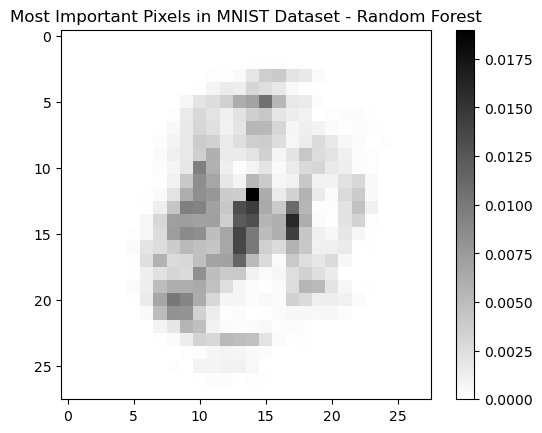

In [86]:
c = plt.imshow(pxl_weights, cmap='binary')
plt.colorbar(c)
plt.title(r"Most Important Pixels in MNIST Dataset - Random Forest")

### With dimensionality reduction

### Principle component analysis

In [143]:
from sklearn.decomposition import PCA

# Selects components that yield 95% of the original variance
pca = PCA(n_components=.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [152]:
from sklearn.ensemble import RandomForestClassifier
import time

t0=time.time()
forest_clf_pca = RandomForestClassifier(n_estimators=500,
                                   n_jobs=-1)
forest_clf_pca.fit(X_train_pca, y_train)
t1=time.time()

dt2=t1-t0

### Time for trial 2

In [138]:
dt1 = t1-t0
print(f"Time for Trial 1: {np.round(dt1,1)} sec")

Time for Trial 1: 69.0 sec


In [155]:
from sklearn.metrics import accuracy_score

y_pred_1 = forest_clf_pca.predict(X_test_pca)
a2=accuracy_score(y_test, y_pred_1)

## Results

In [1]:
print(f"Time without PCA: {dt1}\n\
Accuracy without PCA: {a1}")
print(f"Time with PCA: {dt2}\n\
Accuracy with PCA: {a2}")

NameError: name 'dt1' is not defined

# Exercise 10 | Chapter 8

Use t-SNE to reduce the MNIST dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using 10 different colors to rep‐ resent each image’s target class. Alternatively, you can replace each dot in the scatterplot with the corresponding instance’s class (a digit from 0 to 9), or even plot scaled-down versions of the digit images themselves (if you plot all digits, the visualization will be too cluttered, so you should either draw a random sam‐ ple or plot an instance only if no other instance has already been plotted at a close distance). You should get a nice visualization with well-separated clusters of digits. Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import time
from sklearn.manifold import TSNE

t0 = time.time()
tsne_reducer = TSNE(n_jobs=-1, verbose=1, n_iter=500)

X_train_tsred = tsne_reducer.fit_transform(X_train)

t1 = time.time()
dt = t1-t0

X_test_tsred = tsne_reducer.transform(X_test)


NameError: name 'X_train' is not defined

In [ ]:
c=plt.scatter(X_train_tsred[:,0], X_train_tsred[:,1],alpha=.01,c=y_train)
plt.colorbar(c)

In [ ]:
import pandas as pd
X_train_pd = pd.DataFrame(X_train_tsred)
X_train_pd['ys'] = y_train

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
colors_map = {1:'tab:blue', 2:'tab:orange', 3:'tab:green', 4:'tab:red', 5:'tab:purple', 6:'tab:brown', 
              7:'tab:pink', 8:'tab:grey', 9:'black',0:'maroon'}
c=plt.scatter(X_train_tsred[:,0], X_train_tsred[:,1],alpha=.02,c=X_train_pd['ys'].map(colors_map))

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors_map.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
X_train_pd['ys'].map(colors_map).value_counts()

In [ ]:
df['color'].map(colors).value_counts()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

X_train_pca_pd = pd.DataFrame(X_train_pca)
X_train_pca_pd["ys"] = y_train

X_train_pca_pd["ys"] = X_train_pca_pd["ys"].map(colors_map)

fig, ax = plt.subplots(figsize=(6, 6))

c=plt.scatter(X_train_pca[:,0], X_train_pca[:,1],alpha=.02,c=X_train_pca_pd['ys'])

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors_map.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

X_train_pca_pd = pd.DataFrame(X_train_pca)
X_train_pca_pd["ys"] = y_train

X_train_pca_pd["ys"] = X_train_pca_pd["ys"].map(colors_map)

fig, ax = plt.subplots(figsize=(6, 6))

c=plt.scatter(X_train_pca[:,0], X_train_pca[:,1],alpha=.02,c=X_train_pca_pd['ys'])

handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors_map.items()]
ax.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X[:20000])

In [ ]:
X_pd_lle = pd.Dataframe(X_reduced)
X_pd_lle["ys"] = y[:20000]
X_pd_lle["ys"] = X_pd_lle.map(colors_map)